# Machine Learning For Expresso Churn Prediction

![](https://i.imgur.com/sUrhxfj.png)


## Introduction
**Expresso** is an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of the competition is to develop a predictive model that determines the likelihood for a customer to churn - to stop purchasing airtime and data from Expresso.

**Customer churn** is the marketing term, which is used when an existing customer stops to buying a company's products or exit to use their services. When churn occurs, the customer chooses to cut his ties with the company. That's why churn usually is a huge problem for companies's marketing team. In this case, we define a churn customer as someone who is becoming inactive and not making any transactions for 90 days.

## Content
The data describes 2.5 million Expresso clients.

**Train.csv** - contains information about 2 million customers. There is a column called CHURN that indicates if a client churned or did not churn. This is the target. You must estimate the likelihood that these clients churned. We will use this file to train your model.

**Test.csv** - is similar to train, but without the Churn column. We will use this file to test your model on.

Source: https://www.kaggle.com/datasets/hamzaghanmi/expresso-churn-prediction-challenge

## Project Outline:
- Download the dataset.
- Data Reading
- Exploratory Data Analysis and Data Cleaning
- Feature Engineering
- Setting a baseline
- Splitting the data in training and testing sets
- Assessing multiple algorithms
- Select the best model 
- Hyperparameter tuning
- Performance of the model
- Drawing conclusions — Summary

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [ ]:
jovian.commit()

## Download the dataset.

We'll use the opendatasets helper library to download files from the above URL.

In [214]:
!pip install opendatasets

In [215]:
import opendatasets as od

In [7]:
dataset_url = "https://www.kaggle.com/datasets/hamzaghanmi/expresso-churn-prediction-challenge"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shubhajagadeesha
Your Kaggle Key: ········


100%|████████████████████████████████████████████████████████████████████████████████| 110M/110M [02:17<00:00, 839kB/s]


## Importing Libraries
Here , we will import some useful liberaries according to our work like numpy , pandas , matplotlib ,seaborn etc.

In [93]:
import numpy as np # linear algebra
import pandas as pd 
import os

#Models Packages
from sklearn import metrics
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random

# Import library to download data from Kaggle
import opendatasets as od

# Viz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix, accuracy_score

# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Data Reading

In this section , we will read the data.

In [94]:
#Reading the train data
train_df = pd.read_csv('./expresso-churn-prediction-challenge/Train.csv')
print("Train length:", len(train_df))
print("No of columns:",len(train_df.columns))

Train length: 2154048
No of columns: 19


In [95]:
test_df = pd.read_csv('./expresso-churn-prediction-challenge/Test.csv')
print("Test length:", len(test_df))
print("No of columns:",len(test_df.columns))

Test length: 380127
No of columns: 18


The train dataset has **2154048 rows** of data and **19 columns** and the test dataset has **380127 rows** of data and **18 columns**.

### Loading Train dataset

In [96]:
train_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


### Loading Test dataset

In [97]:
test_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


## Exploratory Data Analysis and Data Cleaning

Exploratory data analysis consists of analyzing the main characteristics of a data set usually by means of visualization methods and summary statistics.

### Missing values and data types

Here, we explore more information about the data. Method pandas.DataFrame.info prints summary of the data frame, including the column names and their data types, the number of non-null values,

In [98]:
%%time
train_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         2154048 non-null  object 
 1   REGION          1304749 non-null  object 
 2   TENURE          2154048 non-null  object 
 3   MONTANT         1397309 non-null  float64
 4   FREQUENCE_RECH  1397309 non-null  float64
 5   REVENUE         1428000 non-null  float64
 6   ARPU_SEGMENT    1428000 non-null  float64
 7   FREQUENCE       1428000 non-null  float64
 8   DATA_VOLUME     1093615 non-null  float64
 9   ON_NET          1367373 non-null  float64
 10  ORANGE          1258800 non-null  float64
 11  TIGO            864032 non-null   float64
 12  ZONE1           169721 non-null   float64
 13  ZONE2           136824 non-null   float64
 14  MRG             2154048 non-null  object 
 15  REGULARITY      2154048 non-null  int64  
 16  TOP_PACK        1251454 non-null  ob

In [99]:
%%time
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         380127 non-null  object 
 1   REGION          230399 non-null  object 
 2   TENURE          380127 non-null  object 
 3   MONTANT         247072 non-null  float64
 4   FREQUENCE_RECH  247072 non-null  float64
 5   REVENUE         252754 non-null  float64
 6   ARPU_SEGMENT    252754 non-null  float64
 7   FREQUENCE       252754 non-null  float64
 8   DATA_VOLUME     193087 non-null  float64
 9   ON_NET          241613 non-null  float64
 10  ORANGE          222897 non-null  float64
 11  TIGO            153126 non-null  float64
 12  ZONE1           29861 non-null   float64
 13  ZONE2           24076 non-null   float64
 14  MRG             380127 non-null  object 
 15  REGULARITY      380127 non-null  int64  
 16  TOP_PACK        221348 non-null  object 
 17  FREQ_TOP_P

From above information, based on the readings of relative materials, we define each field as following.

user_id: unique customer identifier

REGION: customer location

TENURE: duraton being a customer of Expresso

MONTANT: the amount of money the user has paid to the company

FREQUENCE_RECH: number of times the customer recharges their phone account

REVENUE: montly income generated from the customer

ARPU_SEGMENT: average revenue per user segment / income over 90 days/3

FREQUENCE: number of times the customer has made an income

DATA_VOLUME: the amount of data used by the customer

ON_NET: inter Expresso calls made by the user

ORANGE: calls to Orange network

TIGO: calls to Tigo network

ZONE1: calls to ZONE1 network

ZONE2: calls to ZONE2 network

MRG: the merger status / A client who is going

REGULARITY: number of month the customer is active for 90 days

TOP_PACK: the most active packs

FREQ_TOP_PACK: number of times of activating the top service package

CHURN: churned or not (1 if the user has churned, 0 otherwise)

We noticed that MRG,TOP_PACK and TENURE are texts which should be encoded to digits before we train our model.

In [100]:
train_df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [101]:
# Copy of train dataset
churn_df = train_df.copy()

In [102]:
churn_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [103]:
# check unique values of each column
for column in churn_df.columns:
    print('Column: {} - Unique Values: {}'.format(column, churn_df[column].unique()))

Column: user_id - Unique Values: ['00000bfd7d50f01092811bc0c8d7b0d6fe7c3596'
 '00000cb4a5d760de88fecb38e2f71b7bec52e834'
 '00001654a9d9f96303d9969d0a4a851714a4bb57' ...
 'fffff172fda1b4bb38a95385951908bb92379809'
 'fffff5911296937a37f09a37a549da2e0dad6dbb'
 'fffff6dbff1508ea2bfe814e5ab2729ce6b788c2']
Column: REGION - Unique Values: ['FATICK' nan 'DAKAR' 'LOUGA' 'TAMBACOUNDA' 'KAOLACK' 'THIES'
 'SAINT-LOUIS' 'KOLDA' 'KAFFRINE' 'DIOURBEL' 'ZIGUINCHOR' 'MATAM'
 'SEDHIOU' 'KEDOUGOU']
Column: TENURE - Unique Values: ['K > 24 month' 'I 18-21 month' 'G 12-15 month' 'H 15-18 month'
 'J 21-24 month' 'F 9-12 month' 'D 3-6 month' 'E 6-9 month']
Column: MONTANT - Unique Values: [  4250.     nan   3600. ...   8046.  18770. 145500.]
Column: FREQUENCE_RECH - Unique Values: [ 15.  nan   2.   1.  17.  16.   3.   8.  27.   7.  24.  46.  22.  14.
  12.   4.  66.  25.  43.  63.   9.  10.  11.  19.   6.  37.  73.  32.
  48.  29.  13.  30.  40.   5.  31.  20.  21.  18.  28.  26.  41.  23.
  47.  53.  34.  6

Column: MRG - Unique Values: ['NO']
Column: REGULARITY - Unique Values: [54  4 17 62 11  2 55 31 45  1 26 59 37  5 58 12 36 25 20 53 40 43 56 19
  3 32 49 35 57 42  8 28 29 61  9 34  7 51 46 14 27  6 38 60 39 52 21 30
 44 10 24 18 50 33 15 16 23 41 13 47 48 22]
Column: TOP_PACK - Unique Values: ['On net 200F=Unlimited _call24H' nan 'On-net 1000F=10MilF;10d'
 'Data:1000F=5GB,7d' 'Mixt 250F=Unlimited_call24H'
 'MIXT:500F= 2500F on net _2500F off net;2d' 'All-net 500F=2000F;5d'
 'On-net 500F_FNF;3d' 'Data: 100 F=40MB,24H'
 'MIXT: 200mnoff net _unl on net _5Go;30d' 'Jokko_Daily'
 'Data: 200 F=100MB,24H' 'Data:490F=1GB,7d' 'Twter_U2opia_Daily'
 'On-net 500=4000,10d' 'Data:1000F=2GB,30d' 'IVR Echat_Daily_50F'
 'Pilot_Youth4_490' 'All-net 500F =2000F_AllNet_Unlimited'
 'Twter_U2opia_Weekly' 'Data:200F=Unlimited,24H' 'On-net 200F=60mn;1d'
 'All-net 600F= 3000F ;5d' 'Pilot_Youth1_290'
 'All-net 1000F=(3000F On+3000F Off);5d' 'VAS(IVR_Radio_Daily)'
 'Data:3000F=10GB,30d' 'All-net 1000=5000;5d' '

From the cell above, we see that "MRG" column consists of only the value "NO" throughout the data set. It's best to remove such as it wouldn't introduce any information to our model.

In [104]:
churn_df.drop(['user_id', 'MRG',], 1, inplace = True)
test_df.drop(['user_id', 'MRG',], 1, inplace = True)
churn_df.shape     

(2154048, 17)

### Check duplicates

Here, we drop duplicate values.

In [105]:
churn_df = churn_df.drop_duplicates()
churn_df.shape


(1509941, 17)

### Fill/Remove missing values.

In [107]:
#Replace numeric NaN with mean.

def preprocess_data(df):
    for column in df.select_dtypes(include=[np.number]).columns: 
        df[column].fillna(df[column].mean(), inplace=True)
            
    return df

churn_df = preprocess_data(churn_df)
test_df = preprocess_data(test_df)
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509941 entries, 0 to 2154046
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   REGION          1164770 non-null  object 
 1   TENURE          1509941 non-null  object 
 2   MONTANT         1509941 non-null  float64
 3   FREQUENCE_RECH  1509941 non-null  float64
 4   REVENUE         1509941 non-null  float64
 5   ARPU_SEGMENT    1509941 non-null  float64
 6   FREQUENCE       1509941 non-null  float64
 7   DATA_VOLUME     1509941 non-null  float64
 8   ON_NET          1509941 non-null  float64
 9   ORANGE          1509941 non-null  float64
 10  TIGO            1509941 non-null  float64
 11  ZONE1           1509941 non-null  float64
 12  ZONE2           1509941 non-null  float64
 13  REGULARITY      1509941 non-null  int64  
 14  TOP_PACK        1249625 non-null  object 
 15  FREQ_TOP_PACK   1509941 non-null  float64
 16  CHURN           1509941 non-null  in

## Feature Engineering

Here, we map values to column **TENURE**. Fill missing values to Columns **REGION** and **TOP_PACK** with "others" value.
No additional feature is generated from the data set.

In [108]:
def feature_eng(df):
    
    df['REGION'] = df['REGION'].fillna('others')
    df['TOP_PACK'] = df['TOP_PACK'].fillna('others')
    df['TENURE'] = df['TENURE'].map({'K > 24 month': 24, 'I 18-21 month': 18, 'G 12-15 month':12, 'H 15-18 month': 15,
                                            'J 21-24 month': 21, 'F 9-12 month': 9, 'D 3-6 month':3, 'E 6-9 month':6})
    
    return df   

churn_df = feature_eng(churn_df)
test_df = feature_eng(test_df)


In [109]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509941 entries, 0 to 2154046
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   REGION          1509941 non-null  object 
 1   TENURE          1509941 non-null  int64  
 2   MONTANT         1509941 non-null  float64
 3   FREQUENCE_RECH  1509941 non-null  float64
 4   REVENUE         1509941 non-null  float64
 5   ARPU_SEGMENT    1509941 non-null  float64
 6   FREQUENCE       1509941 non-null  float64
 7   DATA_VOLUME     1509941 non-null  float64
 8   ON_NET          1509941 non-null  float64
 9   ORANGE          1509941 non-null  float64
 10  TIGO            1509941 non-null  float64
 11  ZONE1           1509941 non-null  float64
 12  ZONE2           1509941 non-null  float64
 13  REGULARITY      1509941 non-null  int64  
 14  TOP_PACK        1509941 non-null  object 
 15  FREQ_TOP_PACK   1509941 non-null  float64
 16  CHURN           1509941 non-null  in

### Data Visualization

In this section, we analyze the data by using visualization.

#### Target Variable "**CHURN**"

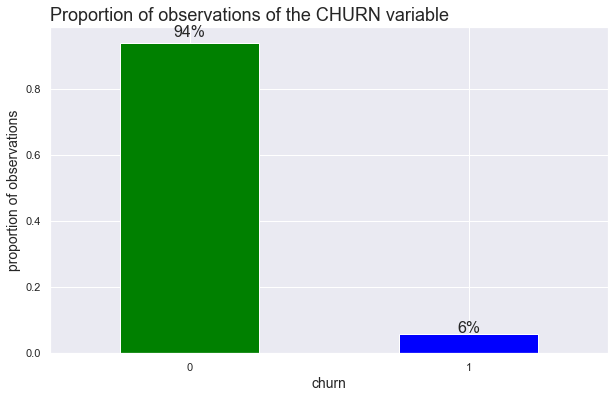

In [110]:
# create a figure
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion of observation of each class
response = churn_df['CHURN'].value_counts(normalize = True)

# create a bar plot showing the percentage of churn
response.plot(kind='bar', 
                   ax=ax,color=['green','blue'])

# set title and labels
ax.set_title('Proportion of observations of the CHURN variable',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('proportion of observations',
              fontsize=14)
ax.tick_params(rotation='auto')
#ax.set_xticklabels(['Not Churned', 'Churned'])


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

Here, the bar plot shows the percentage of observations that correspond to each class of the "CHURN" variable: 0 and 1. 

#### Demographic Information  
#### Region: customer location

In [111]:
Region = churn_df[["REGION","CHURN"]].value_counts(dropna=False).to_frame().reset_index()


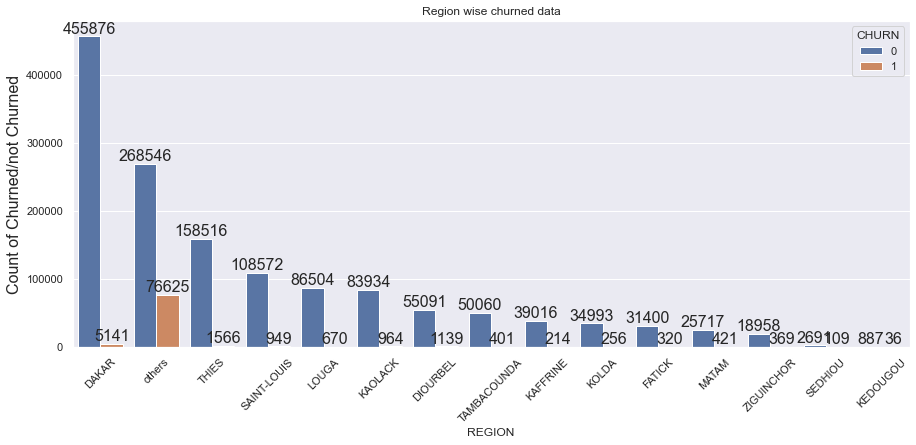

In [112]:

plt.figure(figsize=(15,6))
ax = sns.barplot(x="REGION",y=0,data=Region,hue="CHURN")

ax.set_title("Region wise churned data")

ax.set_ylabel('Count of Churned/not Churned',
              fontsize=16)
              
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

for container in ax.containers:
    ax.bar_label(container)
plt.show()


Region **DAKAR** has most "Not churned" i.e loyal customers. Most churned customers are from **DAKAR** region.

#### TENURE:duration being a customer of Expresso

In [113]:
Tenure = churn_df[["TENURE","CHURN"]].value_counts(dropna=False).to_frame().reset_index()


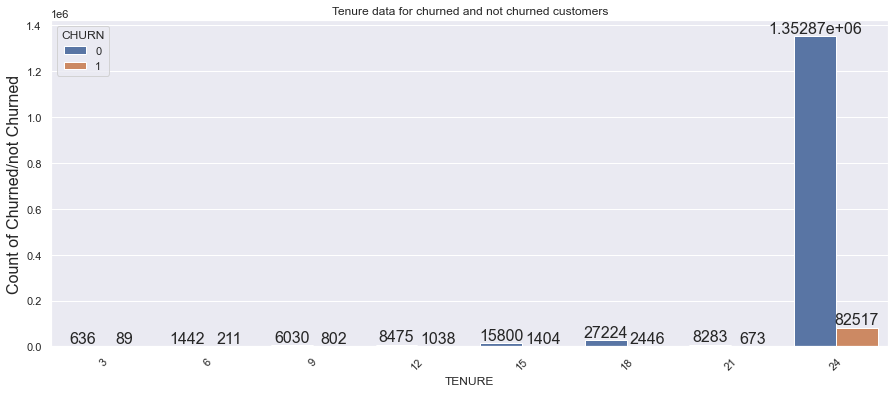

In [114]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x="TENURE",y=0,data=Tenure,hue="CHURN")

ax.set_title("Tenure data for churned and not churned customers")

ax.set_ylabel('Count of Churned/not Churned',
              fontsize=16)
              
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

for container in ax.containers:
    ax.bar_label(container)
plt.show()


Both Churned and Not churned customers have Tenure has K>24 month

#### Fields based on the account information

MONTANT: the amount of money the user has paid to the company

FREQUENCE_RECH: number of times the customer recharges their phone account

REVENUE: monthly income generated from the customer

ARPU_SEGMENT: average revenue per user segment / income over 90 days/3

FREQUENCE: number of times the customer has made an income

REGULARITY: number of month the customer is active for 90 days

FREQ_TOP_PACK: number of times of activating the top service package



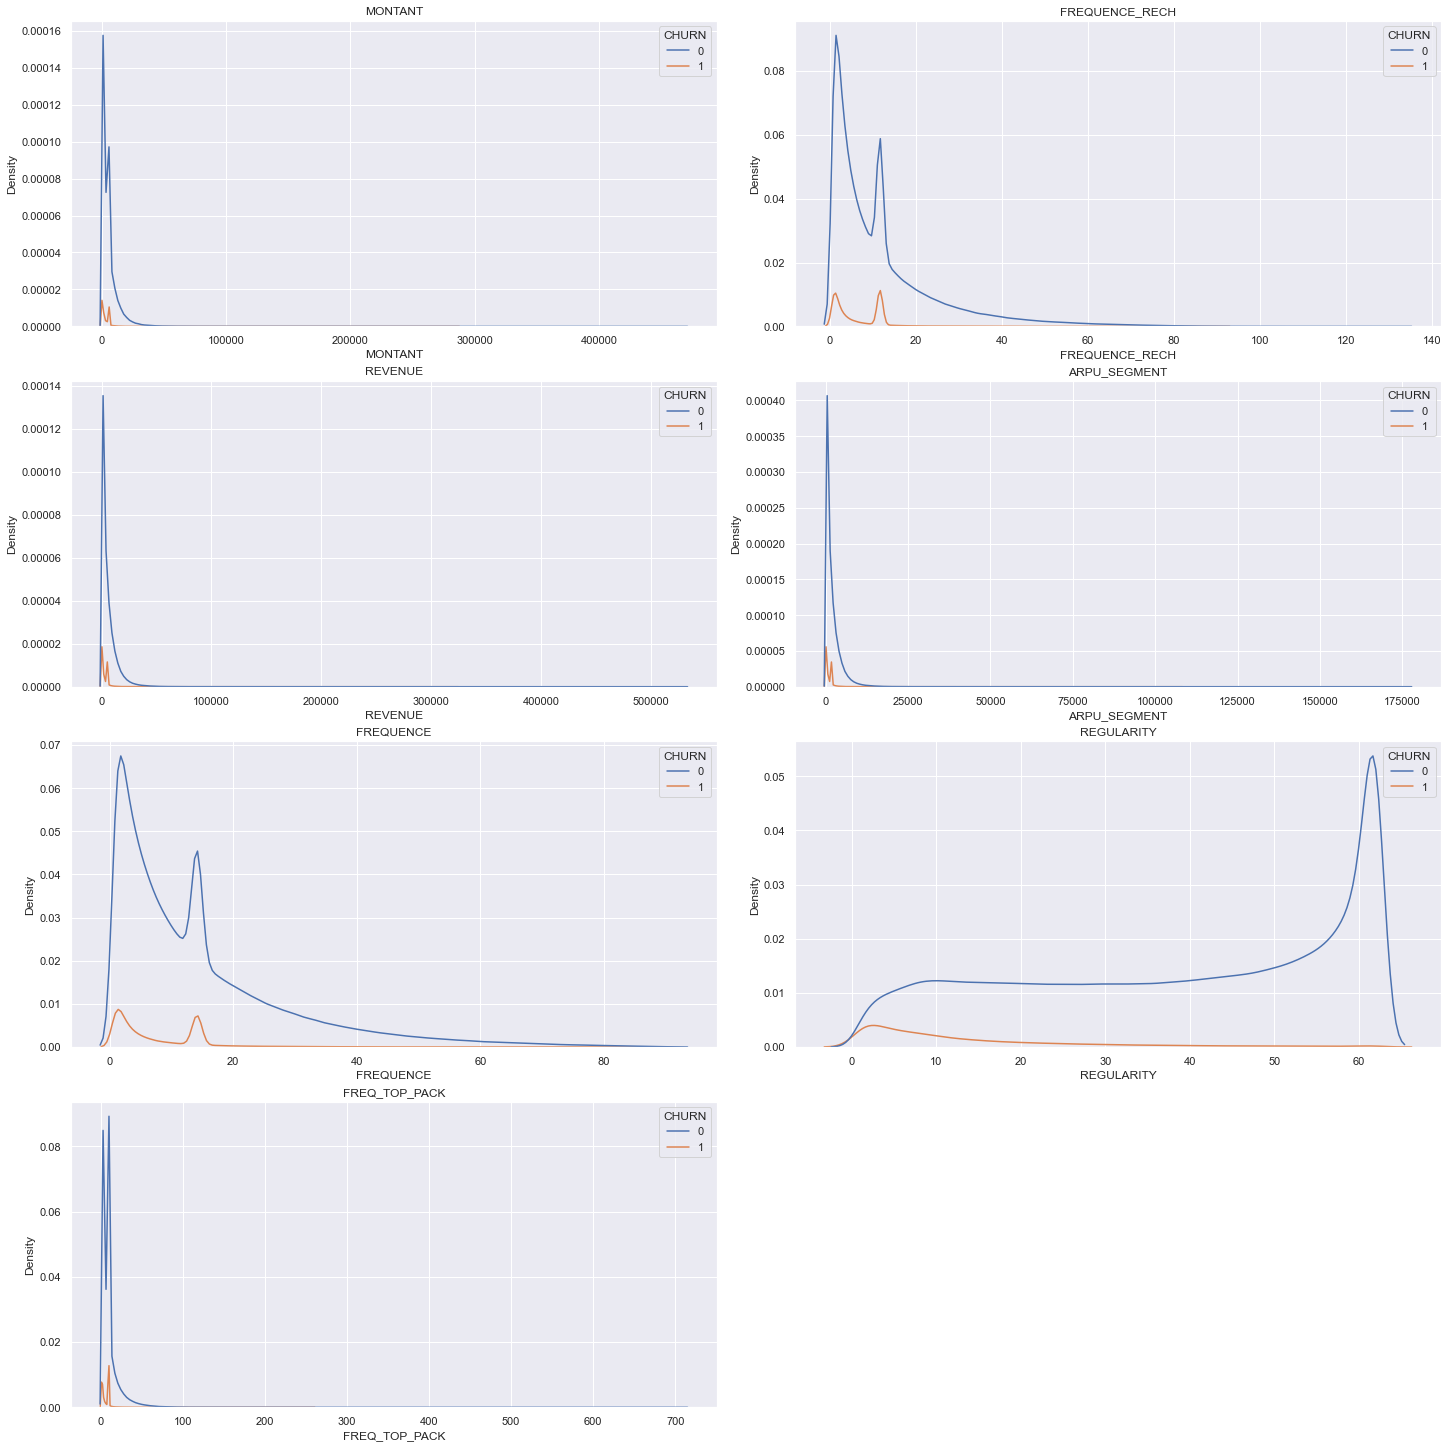

In [115]:
cols = ['MONTANT','FREQUENCE_RECH','REVENUE','ARPU_SEGMENT','FREQUENCE','REGULARITY', 'FREQ_TOP_PACK']

    
fig, axes = plt.subplots(4, 2, figsize=(20,20), constrained_layout=True)

# plot each col onto one ax
for col, ax in zip(cols, axes.flat):
    sns.kdeplot(data = churn_df, x = col,ax=ax, hue = 'CHURN')
    ax.set_title(col)
    
# disable leftover axes
for ax in axes.flat[len(cols):]:
    ax.set_axis_off()    


Clients churn when they have less monthly charges, Frequency recharge,Revenue,ARPU_SEGMENT, Frequency of income, Regularity and Frequency of top pack recharge. All the data columns are skewed, we need to normalize the data.

#### The fields based on the Calls and Data
DATA_VOLUME: the amount of data used by the customer

ON_NET: inter Expresso calls made by the user

ORANGE: calls to Orange network

TIGO: calls to Tigo network

ZONE1: calls to ZONE1 network

ZONE2: calls to ZONE2 network

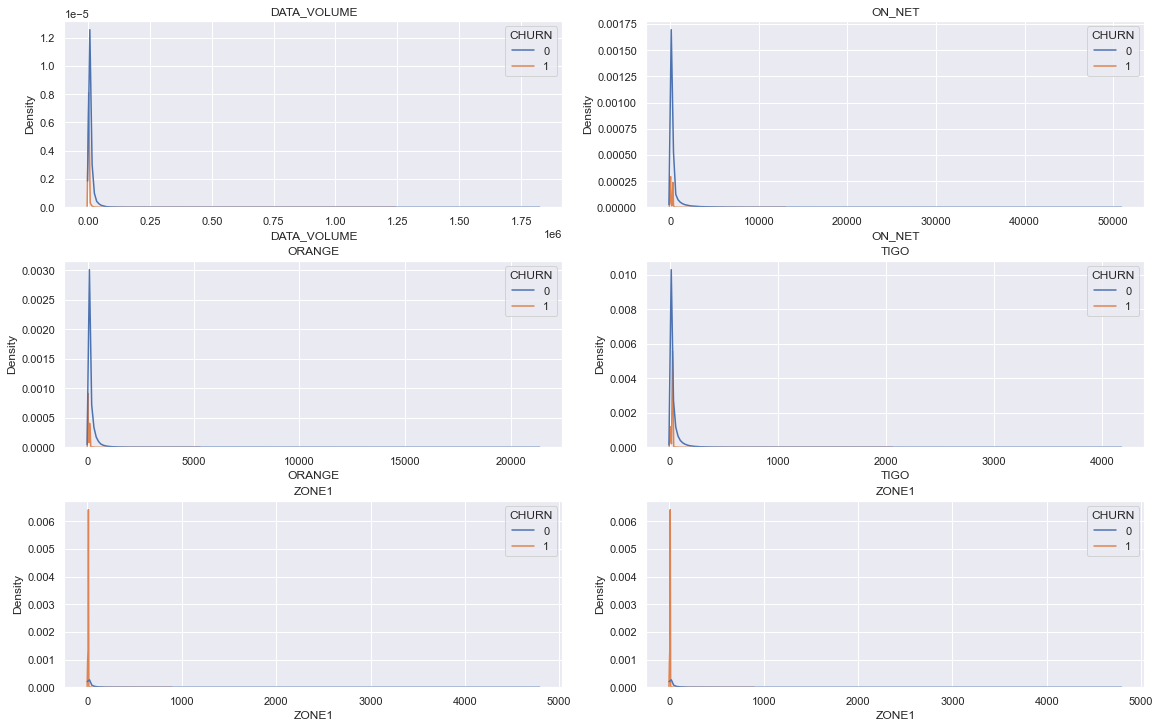

In [116]:
cols = ['DATA_VOLUME','ON_NET','ORANGE','TIGO','ZONE1', 'ZONE1']

fig, axes = plt.subplots(3, 2, figsize=(16,10), constrained_layout=True)

# plot each col onto one ax
for col, ax in zip(cols, axes.flat):
    sns.kdeplot(data = churn_df, x = col,ax=ax, hue = 'CHURN')
    ax.set_title(col)
    
# disable leftover axes
for ax in axes.flat[len(cols):]:
    ax.set_axis_off()    


Client churn when 'DATA_VOLUME', 'ON_NET','ORANGE','TIGO'calls' are less and 'ZONE1', 'ZONE1' calls are more.

#### TOP_PACK vs CHURN

In [117]:

Top_pack = churn_df[["TOP_PACK","CHURN"]].value_counts(dropna=False).to_frame().reset_index()
Top_pack


,TOP_PACK,CHURN,0
0,All-net 500F=2000F;5d,0,306818
1,others,0,220902
2,On net 200F=Unlimited _call24H,0,149366
3,"Data:490F=1GB,7d",0,107841
4,"Data: 100 F=40MB,24H",0,80598
...,...,...,...
235,FIFA_TS_weekly,0,1
236,FIFA_TS_monthly,0,1
237,EVC_500=2000F,1,1
238,ESN_POSTPAID_CLASSIC_RENT,0,1


#### Top packs with clients churn

In [118]:
Top_pack_churn = Top_pack[Top_pack['CHURN'] == 1][:10]
Top_pack_churn



,TOP_PACK,CHURN,0
11,others,1,39414
21,All-net 500F=2000F;5d,1,10161
23,"Data:490F=1GB,7d",1,7256
28,"Data: 100 F=40MB,24H",1,3881
30,"Data:1000F=2GB,30d",1,3030
31,On net 200F=Unlimited _call24H,1,2884
33,Mixt 250F=Unlimited_call24H,1,2837
35,"Data: 200 F=100MB,24H",1,2608
39,Jokko_Daily,1,1884
43,"Data:1000F=5GB,7d",1,1488


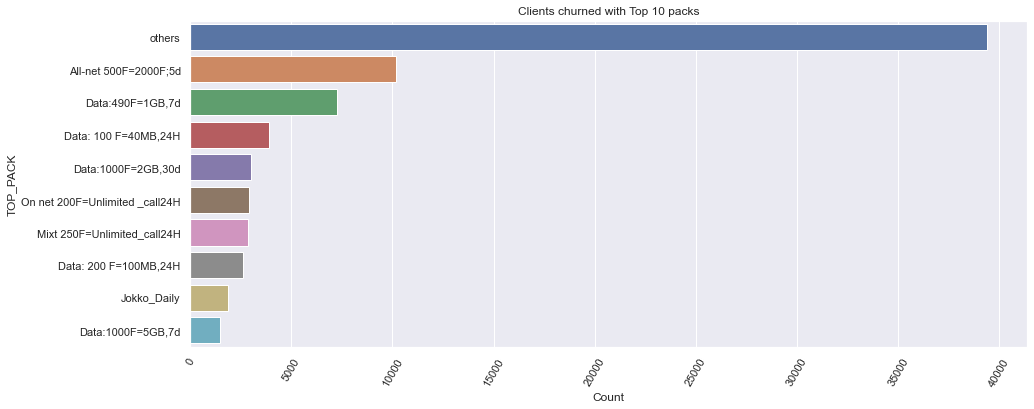

In [119]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'TOP_PACK',x = 0, data = Top_pack_churn) 
plt.xticks(rotation = 60)
plt.title('Clients churned with Top 10 packs')
plt.xlabel("Count")
plt.show()

The Missing pack value clients are more churned.

#### Most Popular packs with clients dont churn

In [120]:
Top_pack_no_churn = Top_pack[Top_pack['CHURN'] == 0][:10]
Top_pack_no_churn


,TOP_PACK,CHURN,0
0,All-net 500F=2000F;5d,0,306818
1,others,0,220902
2,On net 200F=Unlimited _call24H,0,149366
3,"Data:490F=1GB,7d",0,107841
4,"Data: 100 F=40MB,24H",0,80598
5,Mixt 250F=Unlimited_call24H,0,64646
6,MIXT:500F= 2500F on net _2500F off net;2d,0,62981
7,"Data:1000F=2GB,30d",0,56726
8,All-net 500F =2000F_AllNet_Unlimited,0,45998
9,Jokko_Daily,0,42998


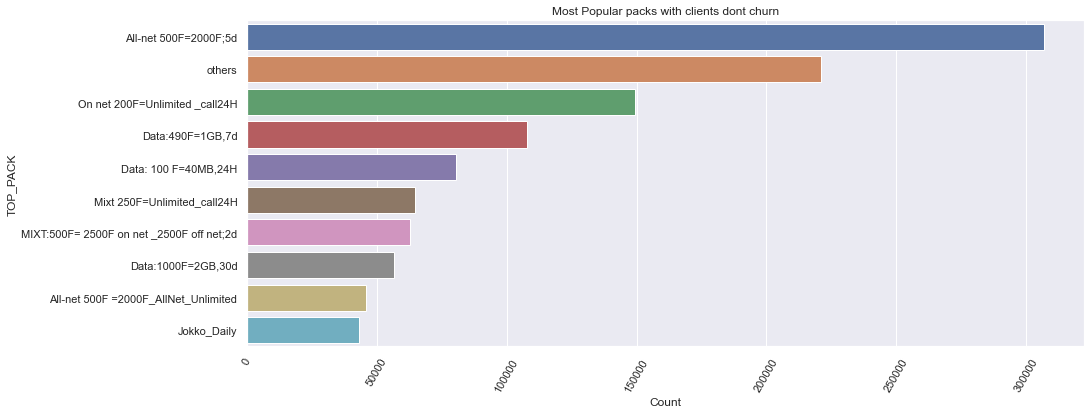

In [121]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'TOP_PACK',x = 0, data = Top_pack_no_churn) 
plt.xticks(rotation = 60)
plt.title('Most Popular packs with clients dont churn')
plt.xlabel("Count")
plt.show()

"All-net 500F=2000F;5d" is the popular pack among the clients who dont churn.

#### Boxplot Analysis for numeric variables

In [122]:
num_cols = churn_df.select_dtypes(include=[np.number]).columns
num_cols

Index(['TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1',
       'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK', 'CHURN'],
      dtype='object')

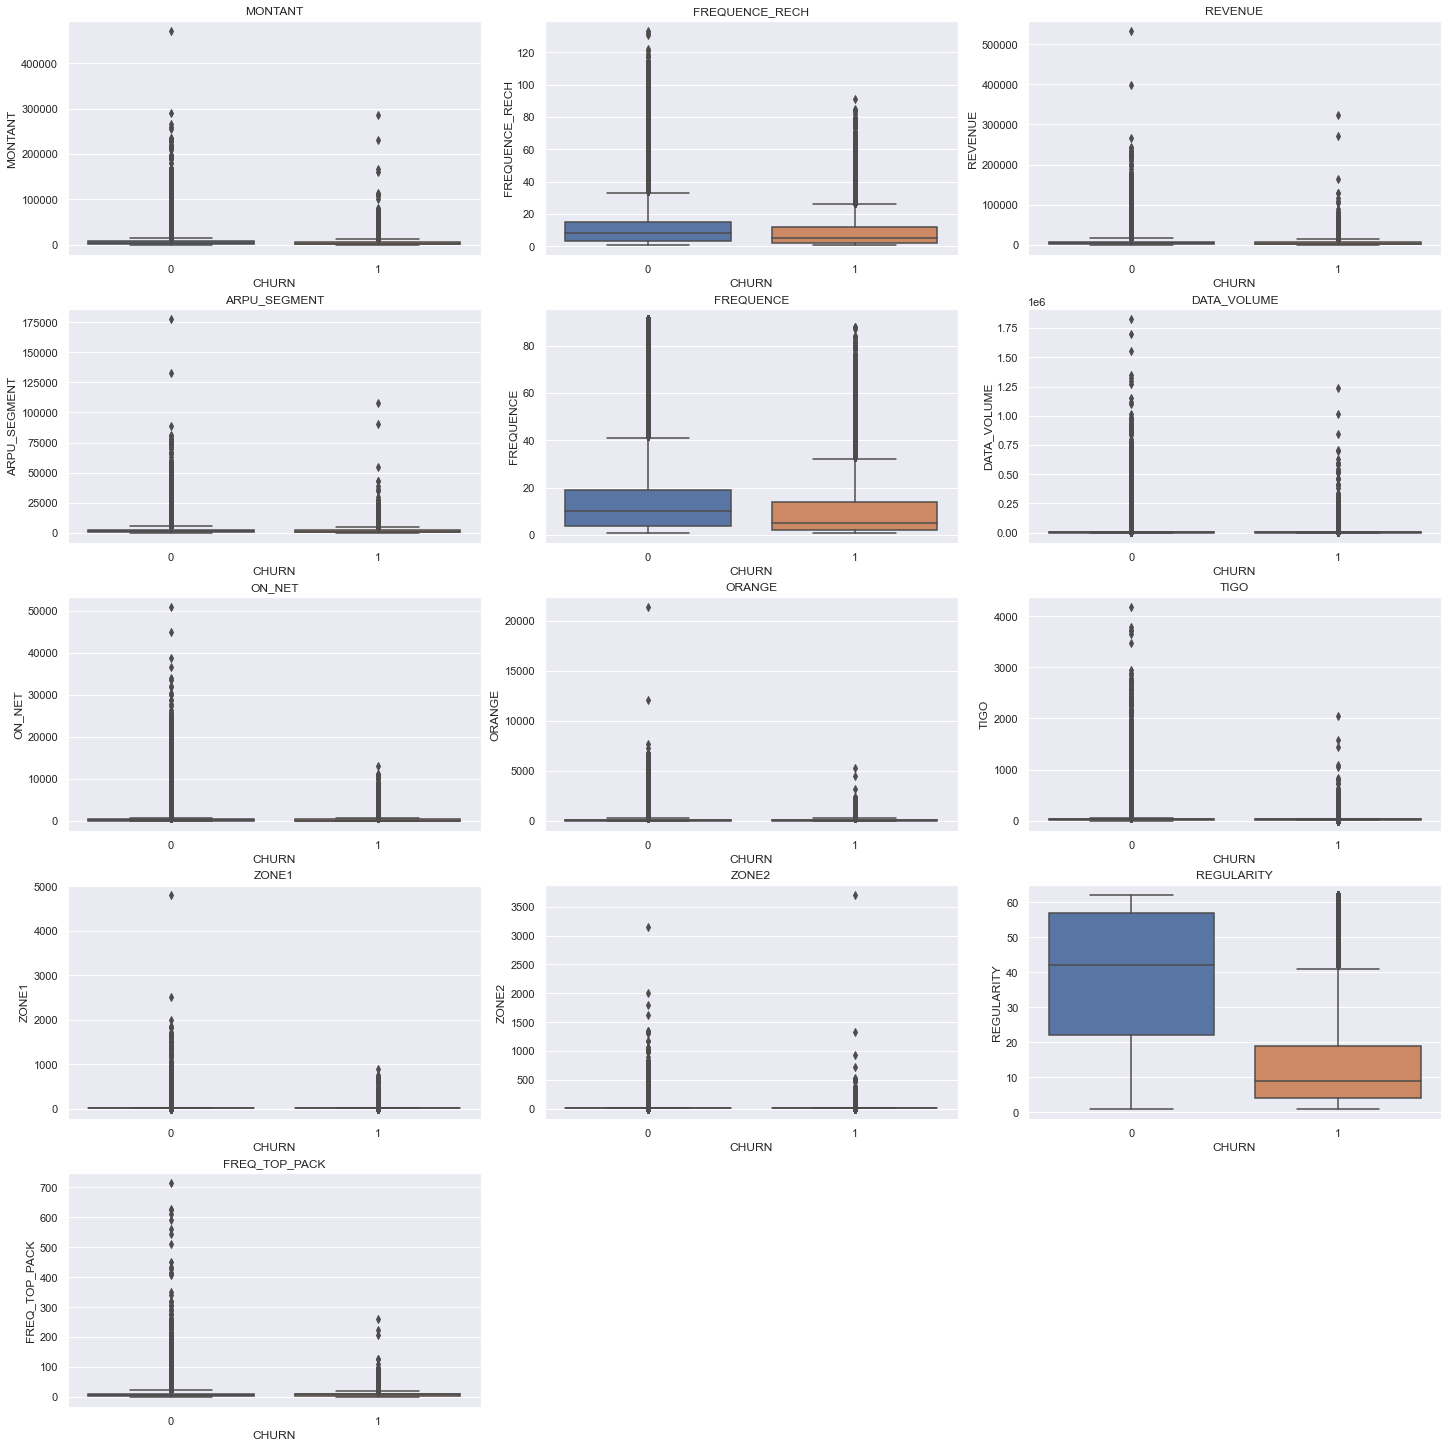

In [123]:
cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1',
       'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK']

fig, axes = plt.subplots(5, 3, figsize=(20,20), constrained_layout=True)

# plot each col onto one ax
for col, ax in zip(cols, axes.flat):
    sns.boxplot(data = churn_df, x = 'CHURN',y = col, ax=ax)
    ax.set_title(col)
    
# disable leftover axes
for ax in axes.flat[len(cols):]:
    ax.set_axis_off() 

All numeric columns have outliers.

#### Label encoding

Here, we do label encoding for the columns "REGION" and "TOP_PACK"

In [124]:
def label_encoder(df):
    le = LabelEncoder()
    df.REGION = le.fit_transform(df.REGION)
    df.TOP_PACK = le.fit_transform(df.TOP_PACK)
    return df   
churn_df = label_encoder(churn_df)
test_df  = label_encoder(test_df)

#### Features correlation analysis

In [125]:
num_cols = churn_df.select_dtypes(include=[np.number]).columns


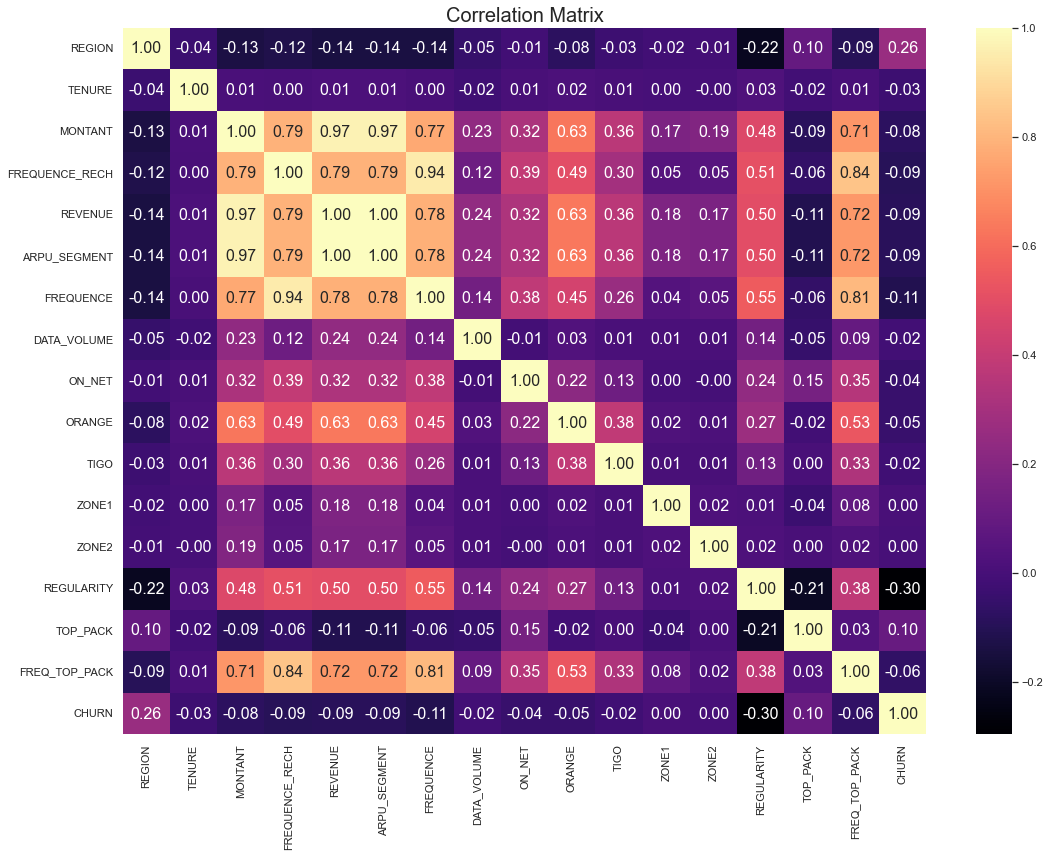

In [126]:
f, ax = plt.subplots(figsize=[18, 13])
cor = churn_df[num_cols].corr()
sns.heatmap(cor, annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [127]:
#Correlation with output variable
cor_target = abs(cor["CHURN"])
#Selecting correlated features
imp_features = cor_target[cor_target>0.2]
print("Important features from Correlation\n", imp_features)

Important features from Correlation
 REGION        0.257135
REGULARITY    0.296221
CHURN         1.000000
Name: CHURN, dtype: float64


#### Data split to Train and Test data

In [128]:
from sklearn.model_selection import train_test_split


y = churn_df['CHURN']
x = churn_df.drop(['CHURN'], axis=1, errors='ignore')

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=42)

## Data Modeling

The following models are used for prediction. The best model will be used for hyperparameter tuning.
- LogisticRegression
- Decision Tree Model
- Bayes Model
- Random Forest
- AdaBoost
- GradientBoosting
- K-NN

### LogisticRegression

Logistic Regression: predicts probability of outcome using linear function as input and uses a sigmoid function to estimate the probability for the given class.

We set the maximum number of iterations to 1000, scale the input data to help the optimization algorithm converge faster.

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix

lr_model = LogisticRegression(max_iter=1000)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr_model = LogisticRegression(class_weight = 'balanced')
lr_model.fit(x_train_scaled, y_train)
y_prob_lr = lr_model.predict_proba(x_test_scaled)[:, 1]
y_pred_lr = lr_model.predict(x_test_scaled)

print("ROC with Logistic Regression:", roc_auc_score(y_test, y_prob_lr))
print("f1 Score:", f1_score(y_test, y_pred_lr))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_lr)}')

ROC with Logistic Regression: 0.9027656738741018
f1 Score: 0.33707516919973174
Confusion Matrix: 
[[912862 223681]
 [ 11595  59815]]


### Decision Tree Model

Decision Tree uses set of rules to make decisions.

In [130]:
from sklearn.tree import DecisionTreeClassifier

dc_model = DecisionTreeClassifier()
dc_model.fit(x_train,y_train)

y_prob_dc = dc_model.predict_proba(x_test)[:,1]
y_pred_dc = dc_model.predict(x_test_scaled)
print("ROC with Decision Tree Model:",roc_auc_score(y_test,y_prob_dc))
print("f1 Score:", f1_score(y_test, y_pred_dc))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_dc)}')


ROC with Decision Tree Model: 0.6345290929174712
f1 Score: 0.00418399301812208
Confusion Matrix: 
[[1130200    6343]
 [  71247     163]]


### Naive Bayes Classifier

Bayes estimates probability of outcome based on Bayes theorem.

In [131]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

y_prob_nb = nb_model.predict_proba(x_test)[:,1]
y_pred_nb = nb_model.predict(x_test)

print("ROC by Naive Bayes:",roc_auc_score(y_test,y_prob_nb))
print("f1 Score:", f1_score(y_test, y_pred_nb))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_nb)}')


ROC by Naive Bayes: 0.8464977542928519
f1 Score: 0.2142465889439586
Confusion Matrix: 
[[668401 468142]
 [  6677  64733]]


### Random Forest

Random Forest: combines many decision trees to make predictions.

In [132]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
rfc_model.fit(x_train,y_train)

y_prob_rfr = rfc_model.predict(x_test)
print("ROC by RandomForest:",roc_auc_score(y_test,y_prob_rfr))
print("f1 Score:", f1_score(y_test, y_prob_rfr))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_prob_rfr)}')


ROC by RandomForest: 0.5891039780154786
f1 Score: 0.2709143729381063
Confusion Matrix: 
[[1120163   16380]
 [  57655   13755]]


### AdaBoost


AdaBoost combines weak models to create a strong model by iteratively adjusting weights to incorrect classification.

In [133]:
from sklearn.ensemble import AdaBoostClassifier

ABC_model = AdaBoostClassifier(random_state=42)
ABC_model.fit(x_train,y_train)

y_prob_ABC = ABC_model.predict_proba(x_test)[:,1]
y_pred_ABC = ABC_model.predict(x_test)

print("ROC by AdaBoost:",roc_auc_score(y_test,y_prob_ABC))
print("f1 Score:", f1_score(y_test, y_pred_ABC))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_ABC)}')



ROC by AdaBoost: 0.9246180087340559
f1 Score: 0.3451446118556749
Confusion Matrix: 
[[1118494   18049]
 [  52752   18658]]


### Gradient Boosting

GBDT builds a series of decision trees to improve upon errors of the previous trees.

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
GBDT_model = GradientBoostingClassifier(random_state=42)
GBDT_model.fit(x_train,y_train)

y_prob_GBDT = GBDT_model.predict_proba(x_test)[:,1]
y_pred_GBDT = GBDT_model.predict(x_test)

print("ROC by Gradient Boosting:",roc_auc_score(y_test,y_prob_GBDT))
print("f1 Score:", f1_score(y_test, y_pred_GBDT))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_GBDT)}')

ROC by Gradient Boosting: 0.927671697298038
f1 Score: 0.2559564768622054
Confusion Matrix: 
[[1126848    9695]
 [  59507   11903]]


#### Tabulate the Model Results

In [136]:

from tabulate import tabulate

Results = pd.DataFrame([['Logistic Regression', roc_auc_score(y_test, y_prob_lr), f1_score(y_test, y_pred_lr)],
                         ['Decision Tree', roc_auc_score(y_test, y_prob_dc), f1_score(y_test, y_pred_dc)],
                         ['Naive Bayes', roc_auc_score(y_test, y_prob_nb), f1_score(y_test, y_pred_nb)],
                         ['Random Forest', roc_auc_score(y_test, y_prob_rfr), f1_score(y_test, y_prob_rfr)],
                         ['AdaBoost', roc_auc_score(y_test, y_prob_ABC),f1_score(y_test, y_pred_ABC)],
                         ['GBDT', roc_auc_score(y_test, y_prob_GBDT), f1_score(y_test, y_pred_GBDT)]],
                        columns=['Algorithm', 'ROC AUC Score', 'f1 Score'])

print(tabulate(Results, headers='keys', tablefmt='pretty'))


+---+---------------------+--------------------+---------------------+
|   |      Algorithm      |   ROC AUC Score    |      f1 Score       |
+---+---------------------+--------------------+---------------------+
| 0 | Logistic Regression | 0.9027656738741018 | 0.33707516919973174 |
| 1 |    Decision Tree    | 0.6345290929174712 | 0.00418399301812208 |
| 2 |     Naive Bayes     | 0.8464977542928519 | 0.2142465889439586  |
| 3 |    Random Forest    | 0.5891039780154786 | 0.2709143729381063  |
| 4 |      AdaBoost       | 0.9246180087340559 | 0.3451446118556749  |
| 5 |        GBDT         | 0.927671697298038  | 0.2559564768622054  |
+---+---------------------+--------------------+---------------------+


For the given test dataset, **AdaBoost** model is getting ROC AUC Score as 0.9246 and f1 score as 0.3415 which is best among the all used models.

## Hyperparameter Tuning with cross validation and model optomization

Let's perform some hyperparameter tuning to improve accuracy with AdaBoost Model. We will get the optimal value for hyperparameters. As here we will do for n_estimators and learning_rate.

Use RandomizedSearch to find the optimized parameters.

In [153]:
# parameters for hyperparameter tuning

parameters = {
    "n_estimators":[5,10,50,100,150,200, 250,300,350],
     "learning_rate":[0.001,0.01,0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
}

AB_model = AdaBoostClassifier()

# RandomizedSearch Cross Validation
cv = RandomizedSearchCV(AB_model, parameters, scoring='roc_auc', cv=3, n_jobs=-1)
cv.fit(x_train, y_train)
cv.best_params_



{'n_estimators': 250, 'learning_rate': 0.2}

Update the model with best parameters.

In [154]:
best_n_estimators = 250
best_learning_rate = 0.2

ABC_model_best = AdaBoostClassifier(n_estimators=best_n_estimators, learning_rate=best_learning_rate, random_state=42)
ABC_model_best.fit(x_train, y_train)

y_prob_abC_best = ABC_model_best.predict_proba(x_test)[:, 1]
y_pred_abC_best = ABC_model_best.predict(x_test)

print("AdaBoost algorithm ROC score:", roc_auc_score(y_test, y_prob_abC_best))
print("AdaBoost algorithm f1 Score", f1_score(y_test, y_pred_abC_best))
print("AdaBoost algorithm Accuracy Score",accuracy_score(y_test, y_pred_abC_best))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_abC_best)}')



AdaBoost algorithm ROC score: 0.9257049096251757
AdaBoost algorithm f1 Score 0.34208286967336515
AdaBoost algorithm Accuracy Score 0.9417551841834906
Confusion Matrix: 
[[1119305   17238]
 [  53119   18291]]


 #### ROC_AUC Curve

ROC AUC Score, is a metric that allows us to compare different ROC Curves.

The green line is the lower limit, and the area under that line is 0.5, and the perfect ROC Curve would have an area of 1. As closer as our model’s ROC AUC is from 1, the better it is in separating classes and making better predictions.

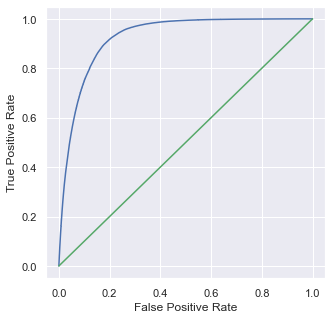

In [155]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_prob_abC_best)


#### Feature Importance

In [156]:
def plot_importance(model, features):
    plt.figure(figsize=(7, 7))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=features.sort_values(by="Value", ascending=False))
    plt.title('Features')
    plt.tight_layout()
    plt.show()

features = x.columns
importances = ABC_model_best.feature_importances_

feat_importances = pd.DataFrame()
feat_importances['Feature'] = features
feat_importances['Value'] = importances

sorted_feat_importances = feat_importances.sort_values('Value', ascending=False)
print("Feature Importance")
print(tabulate(sorted_feat_importances, headers='keys', tablefmt='pretty', showindex=False))



Feature Importance
+----------------+-------+
|    Feature     | Value |
+----------------+-------+
|  DATA_VOLUME   | 0.168 |
|   REGULARITY   | 0.156 |
|     ON_NET     | 0.14  |
|     REGION     | 0.12  |
|    MONTANT     | 0.076 |
|     ORANGE     | 0.068 |
| FREQUENCE_RECH | 0.048 |
|    REVENUE     | 0.04  |
|     ZONE1      | 0.04  |
|    TOP_PACK    | 0.036 |
|     ZONE2      | 0.028 |
|  ARPU_SEGMENT  | 0.024 |
|     TENURE     | 0.02  |
| FREQ_TOP_PACK  | 0.016 |
|   FREQUENCE    | 0.012 |
|      TIGO      | 0.008 |
+----------------+-------+


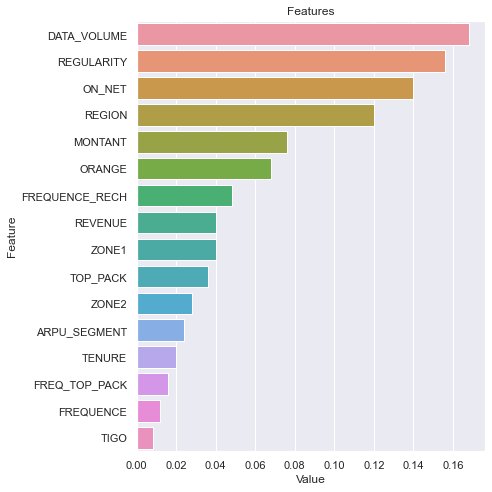

In [157]:
# plot_importance function
plot_importance(ABC_model_best, feat_importances)

In [158]:
test_sub = pd.read_csv('./expresso-churn-prediction-challenge/Test.csv')

# Save the user_id column before preprocessing
user_ids = test_sub['user_id']

predictions = ABC_model_best.predict_proba(test_df)[:,1]

submission = pd.DataFrame({'user_id': user_ids, 'CHURN': predictions})
submission.to_csv('submission.csv', index=False)

## Conclusion

We have drawn many inferences from this project. Here's a conclusion of the project:

- The dataset contains 2154048 rows and 19 data fields.
- We have explored data by statistically i.e. shape of the data, NULL value count etc. and by graph visualization.
- Data preprocessing like removing duplicates, filling  missing values, feature enginnering, standardization of the data was done before building ML models.
- The summary of different machine learning models have shown in the below table:

 ![](https://i.imgur.com/PfyRXWD.png)
    


- We can conclude from the above table, AdaBoost is performing well with current processed data. 
- We also found that the most important features for predicting customer churn were DATA_VOLUME, REGULARITY, ON_NET,REGION, MONTANT, which can help the company take appropriate actions to retain customers and avoid loss of revenue.

## Future Work

Future improvements for this project could be as follows:

- Some more feature engineering to provide the machine learning models with information.
- Researching ways to overcome the imbalanced dataset.
- Further outliers treatment.
- Hyperparameter tuning to further improve the results.

## References:

- https://towardsdatascience.com/end-to-end-machine-learning-project-telco-customer-churn-90744a8df97d
- https://www.kaggle.com/datasets/hamzaghanmi/expresso-churn-prediction-challenge
- https://jovian.com/learn/zero-to-data-analyst-bootcamp/assignment/project-3-machine-learning-with-python